In [1]:
#pip list
import librosa
print(librosa.__version__)

0.10.2.post1


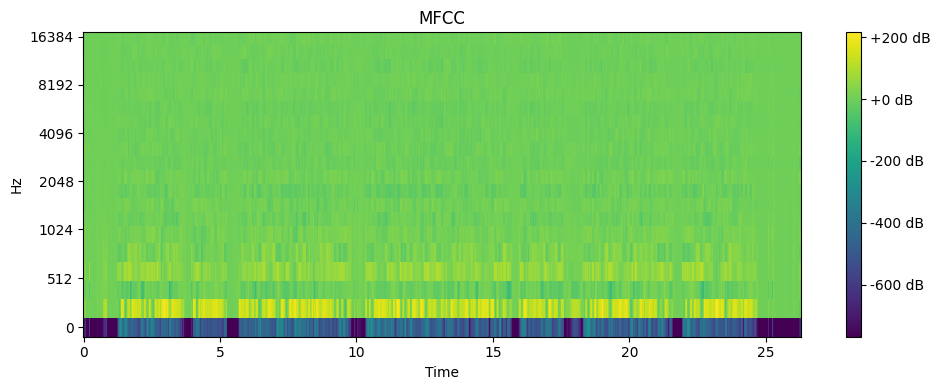

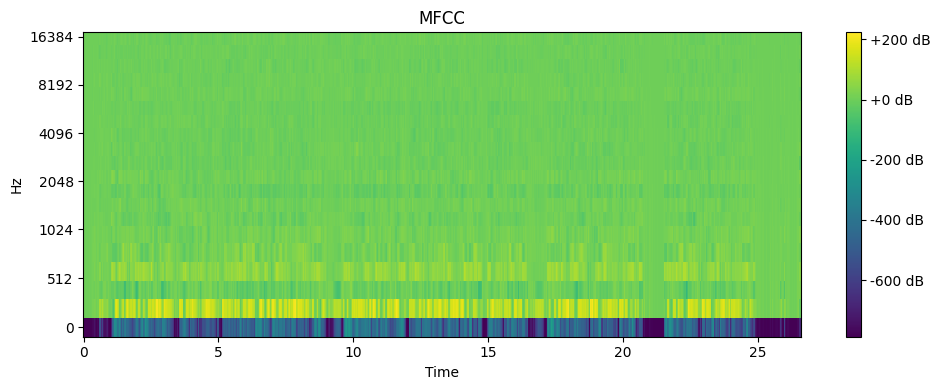

In [10]:
import librosa
import matplotlib.pyplot as plt

def plot_mfcc(audio_file):
    """Plots the Mel-Frequency Cepstral Coefficients (MFCCs) of an audio file.

    Args:
        audio_file: Path to the audio file.
    """

    # Load the audio file
    x, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=x, sr=sr)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

# Define your file paths
audio_file1 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 1.wav"
audio_file2 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 2.wav"

# Plot the MFCCs of both audio files
plot_mfcc(audio_file1)
plot_mfcc(audio_file2)

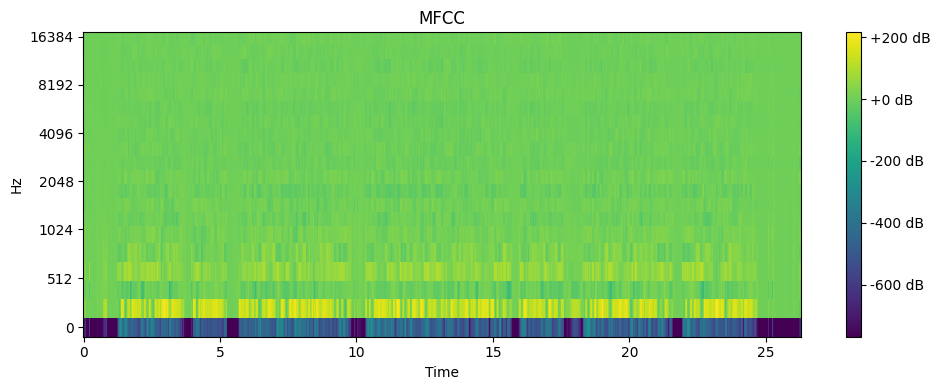

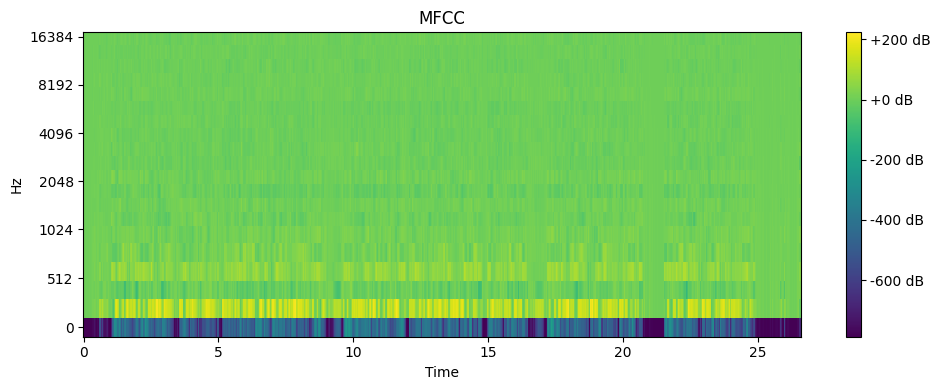

In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define your file paths
audio_file1 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 1.wav"
audio_file2 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 2.wav"

# Load audio files
x1, sr1 = librosa.load(audio_file1, sr=None)
x2, sr2 = librosa.load(audio_file2, sr=None)

# Plot the MFCCs of both audio files
plot_mfcc(audio_file1)
plot_mfcc(audio_file2)

# Ensure consistent n_mfcc (optional)
#n_mfcc = 40

def compare_mfccs(mfcc1, mfcc2):

    # Check if reshaping is necessary
    if len(mfcc1.shape) == 1:
        mfcc1 = mfcc1.reshape(1, -1)
    if len(mfcc2.shape) == 1:
        mfcc2 = mfcc2.reshape(1, -1)

    # Calculate DTW distance
    dist, _ = librosa.sequence.dtw(X=mfcc1.T, Y=mfcc2.T, metric='euclidean')

    # Calculate similarity score based on DTW distance
    similarity = 1 - (dist / np.max(alignment.distance_matrix))

    return similarity

def plot_mfcc(audio_file):
    """Plots the Mel-Frequency Cepstral Coefficients (MFCCs) of an audio file.

    Args:
        audio_file: Path to the audio file.
    """

    # Load the audio file
    x, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=x, sr=sr)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()



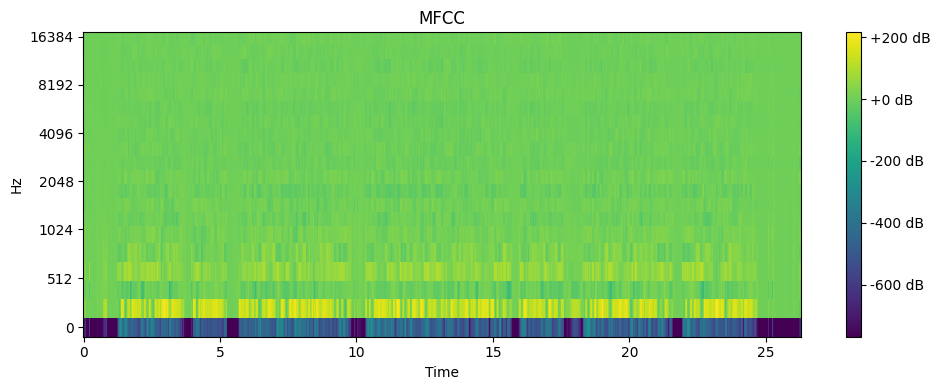

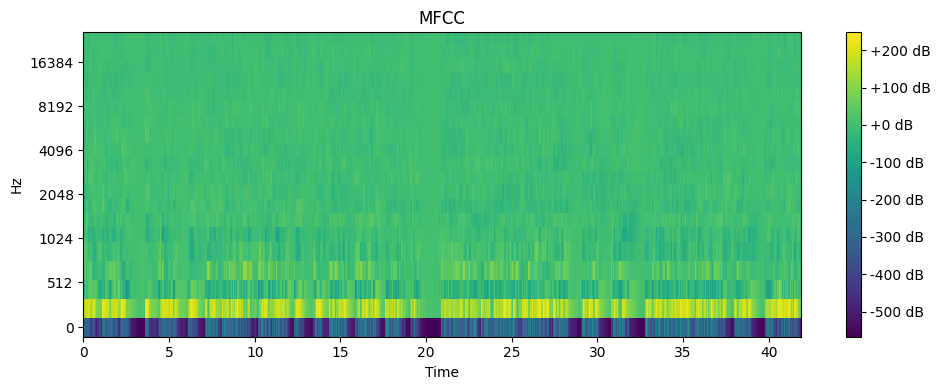

In [1]:
import librosa
import matplotlib.pyplot as plt

def plot_mfcc(audio_file):
    """Plots the Mel-Frequency Cepstral Coefficients (MFCCs) of an audio file.

    Args:
        audio_file: Path to the audio file.
    """

    # Load the audio file
    x, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=x, sr=sr)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

# Define your file paths
audio_file1 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 1.wav"
audio_file2 = "C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Andrew Tate on Woman Driving.wav"

# Plot the MFCCs of both audio files
plot_mfcc(audio_file1)
plot_mfcc(audio_file2)

In [14]:
import librosa
import tensorflow as tf
import numpy as np

def load_audio_file(file_path):
    audio, sr = librosa.load(file_path)
    return audio, sr

# Load audio files
audio1, sr1 = load_audio_file("C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Recording Example 1.wav")
audio2, sr2 = load_audio_file("C:\\Users\\cutaj\\OneDrive\\Desktop\\Speech Recognition Project\\Taken Recordings\\WAV Format\\Andrew Tate on Woman Driving.wav")

# Ensure both audio files have the same sample rate
if sr1 != sr2:
    audio1 = librosa.resample(audio1, sr1, sr2)
    sr1 = sr2

# Extract MFCC features
mfccs1 = librosa.feature.mfcc(y=audio1, sr=sr1, n_mfcc=40).T
mfccs2 = librosa.feature.mfcc(y=audio2, sr=sr2, n_mfcc=40).T

# Truncate longer audio (optional, adjust based on your needs)
max_len = min(mfccs1.shape[0], mfccs2.shape[0])
mfccs1 = mfccs1[:max_len, :]
mfccs2 = mfccs2[:max_len, :]

# Calculate cosine similarity
#similarity = 1 - tf.keras.losses.cosine_similarity(mfccs1, mfccs2)
#print("Similarity:", similarity.numpy())

# Calculate cosine similarity
similarity_scores = 1 - tf.keras.losses.cosine_similarity(mfccs1, mfccs2)
average_similarity = np.mean(similarity_scores)
print("Average Similarity:", average_similarity)

Average Similarity: 1.8828232
